In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!python3 --version

Python 3.11.9


Here, I'm going to understand what the original dataset looks like. Then, we will drop unnecessary columns as well as observations where the class is NaN.

In [3]:
# Load the dataset from the CSV file
uav_network_df = pd.read_csv("UAV_Network_Dataset.csv", dtype = str)

# Fixing missing class labels for the benign physical samples in the original dataset
uav_network_df.loc[9426:13715, "class"] = "benign"

# Any non-benign observation is labeled as "attack", because our goal is to only detect intrusions or attacks
uav_network_df.loc[uav_network_df["class"] != "benign", "class"] = "attack"

# Also fill any remaining NaN values with "attack"
uav_network_df["class"] = uav_network_df["class"].fillna("attack")

In [4]:
# Print information about each column
print("Information about columns...\n\n")
uav_network_df.info()

Information about columns...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54783 entries, 0 to 54782
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   timestamp_c             54783 non-null  object
 1   frame.number            54783 non-null  object
 2   frame.len               54783 non-null  object
 3   frame.protocols         54783 non-null  object
 4   wlan.duration           54783 non-null  object
 5   wlan.ra                 54783 non-null  object
 6   wlan.ta                 54783 non-null  object
 7   wlan.da                 54783 non-null  object
 8   wlan.sa                 54783 non-null  object
 9   wlan.bssid              54783 non-null  object
 10  wlan.frag               54783 non-null  object
 11  wlan.seq                54783 non-null  object
 12  llc.type                54783 non-null  object
 13  ip.hdr_len              54783 non-null  object
 14  ip.len                 

In [5]:
# Print a statistical summary of the data
print("\n\nStatistical summary of data...\n\n")
uav_network_df.describe()



Statistical summary of data...




,timestamp_c,frame.number,frame.len,frame.protocols,wlan.duration,wlan.ra,wlan.ta,wlan.da,wlan.sa,wlan.bssid,...,tcp.options,udp.srcport,udp.dstport,udp.length,data.data,data.len,wlan.fc.type,wlan.fc.subtype,time_since_last_packet,class
count,54783,54783,54783,54783,54783,54783,54783,54783,54783,54783,...,43070,43070,43070,43070,42262,42262,42262,33104,33104,54783
unique,40386,9461,231,53,29,79,80,353,44,131,...,813,815,857,48,474,46,6,10,17004,2
top,12,-1,26,0,314,0,0,0,0,0,...,0,0,0,0,0,0,0,12,2.30E-05,attack
freq,807,5473,22465,35693,16832,23586,29698,26396,19697,46581,...,30928,26331,32014,35487,35537,26381,17576,22460,76,41068


In [6]:
# First five observations in the dataset
uav_network_df.head()

,timestamp_c,frame.number,frame.len,frame.protocols,wlan.duration,wlan.ra,wlan.ta,wlan.da,wlan.sa,wlan.bssid,...,tcp.options,udp.srcport,udp.dstport,udp.length,data.data,data.len,wlan.fc.type,wlan.fc.subtype,time_since_last_packet,class
0,28105.9752,60,24,0,0,1,1,1,1,0,...,0,0,0,0,0,0,2,4,0,benign
1,28105.9755,61,24,0,0,1,1,1,1,0,...,0,0,0,0,0,0,2,4,0.000298,benign
2,28107.09931,75,104,0,0,4,1,4,1,0,...,0,0,0,0,0,0,0,8,1.123815,benign
3,28114.7857,122,86,2,44,1,0,1,0,0,...,1,0,0,0,0,0,2,8,7.686387,benign
4,28114.88188,124,26,0,60,1,0,1,0,0,...,0,0,0,0,0,0,2,12,0.096183,benign


In [7]:
# Last five observations in the dataset
# Observe that they contain a lot of NaN values, even their class is NaN
# These will be dropped (or "cleaned") from our data
uav_network_df.tail()

,timestamp_c,frame.number,frame.len,frame.protocols,wlan.duration,wlan.ra,wlan.ta,wlan.da,wlan.sa,wlan.bssid,...,tcp.options,udp.srcport,udp.dstport,udp.length,data.data,data.len,wlan.fc.type,wlan.fc.subtype,time_since_last_packet,class
54778,12,61,45,104,0,24,179,0,0,0,...,-44.64154535,9.200630612,6.027533453,FDI,NaN,NaN,NaN,NaN,NaN,attack
54779,12,61,45,104,0,24,179,0,0,0,...,-45.73679353,7.40427046,5.141048091,FDI,NaN,NaN,NaN,NaN,NaN,attack
54780,12,61,45,104,0,24,179,0,0,0,...,-46.45840489,6.522716201,4.755015641,FDI,NaN,NaN,NaN,NaN,NaN,attack
54781,12,61,46,106,0,24,180,0,0,0,...,-45.90483529,6.201081795,5.654590795,FDI,NaN,NaN,NaN,NaN,NaN,attack
54782,12,62,51,106,1,25,178,1,0,0,...,-41.97397398,7.184936734,10.00216155,FDI,NaN,NaN,NaN,NaN,NaN,attack


Now, it's time to clean our dataset. First, we will drop several unnecessary features. Then, we will drop all observations that have a NaN value for any of the remaining features.

In [8]:
# Drop features that are useless in detecting network intrusions 
cleaned_uav_network_df = uav_network_df.drop(columns = ["frame.number", "wlan.ra", "wlan.ta", "wlan.da", 
                                                        "wlan.sa", "wlan.bssid", "ip.id", "ip.src", "ip.dst", 
                                                       "tcp.seq_raw", "tcp.ack_raw", "tcp.options", "data.data"])

# Drop attributes that could be useful for a future project, but increase dimensionality right now
cleaned_uav_network_df = cleaned_uav_network_df.drop(columns = ["timestamp_c", "frame.protocols", "wlan.seq", "ip.flags", 
                                                        "tcp.srcport", "tcp.dstport", "udp.srcport", "udp.dstport"])


In [9]:
cleaned_uav_network_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54783 entries, 0 to 54782
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   frame.len               54783 non-null  object
 1   wlan.duration           54783 non-null  object
 2   wlan.frag               54783 non-null  object
 3   llc.type                54783 non-null  object
 4   ip.hdr_len              54783 non-null  object
 5   ip.len                  54783 non-null  object
 6   ip.ttl                  48544 non-null  object
 7   ip.proto                48544 non-null  object
 8   tcp.hdr_len             43070 non-null  object
 9   tcp.flags               43070 non-null  object
 10  tcp.window_size         43070 non-null  object
 11  udp.length              43070 non-null  object
 12  data.len                42262 non-null  object
 13  wlan.fc.type            42262 non-null  object
 14  wlan.fc.subtype         33104 non-null  object
 15  ti

In [10]:
cleaned_uav_network_df.describe()

,frame.len,wlan.duration,wlan.frag,llc.type,ip.hdr_len,ip.len,ip.ttl,ip.proto,tcp.hdr_len,tcp.flags,tcp.window_size,udp.length,data.len,wlan.fc.type,wlan.fc.subtype,time_since_last_packet,class
count,54783,54783,54783,54783,54783,54783,48544,48544,43070,43070,43070,43070,42262,42262,33104,33104,54783
unique,231,29,3681,92,236,7585,223,358,813,813,821,48,46,6,10,17004,2
top,26,314,0,0,0,0,0,0,0,0,0,0,0,0,12,2.30E-05,attack
freq,22465,16832,40694,24745,25076,24438,33312,33666,31680,39332,30928,35487,26381,17576,22460,76,41068


The next step is to tackle NaN values. Observe that the datatype of all columns is object. We must convert features to numeric datatypes in order to use the autoencoder.

In [11]:
# Convert all columns (except the prediction target, class) to numeric datatypes
# Coerce errors into NaN
for column in cleaned_uav_network_df.columns:
    if column != "class":
        cleaned_uav_network_df[column] = pd.to_numeric(cleaned_uav_network_df[column], errors = "coerce")

In [12]:
# All features now have the datatype float64
cleaned_uav_network_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54783 entries, 0 to 54782
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   frame.len               54774 non-null  float64
 1   wlan.duration           54774 non-null  float64
 2   wlan.frag               54774 non-null  float64
 3   llc.type                54774 non-null  float64
 4   ip.hdr_len              54774 non-null  float64
 5   ip.len                  54774 non-null  float64
 6   ip.ttl                  48538 non-null  float64
 7   ip.proto                48538 non-null  float64
 8   tcp.hdr_len             43065 non-null  float64
 9   tcp.flags               43065 non-null  float64
 10  tcp.window_size         43065 non-null  float64
 11  udp.length              42258 non-null  float64
 12  data.len                42258 non-null  float64
 13  wlan.fc.type            33102 non-null  float64
 14  wlan.fc.subtype         33102 non-null

In [13]:
# Now, we can actually see the statistical summary (std, min, percentiles, max) of features because we're using numeric datatypes
cleaned_uav_network_df.describe()

,frame.len,wlan.duration,wlan.frag,llc.type,ip.hdr_len,ip.len,ip.ttl,ip.proto,tcp.hdr_len,tcp.flags,tcp.window_size,udp.length,data.len,wlan.fc.type,wlan.fc.subtype,time_since_last_packet
count,54774.000000,54774.00000,54774.000000,54774.000000,54774.000000,5.477400e+04,48538.000000,48538.000000,43065.000000,43065.000000,43065.000000,42258.000000,42258.000000,33102.000000,33102.000000,33102.000000
mean,69.233487,115.52346,2300.825319,357.358802,25.864388,3.766453e+08,53.911183,6.939831,2.110892,0.352040,3250.535055,24.695371,30.547139,0.938070,10.616096,0.172855
std,112.519518,152.94823,6117.247607,757.783524,51.818721,9.660565e+08,96.990394,42.178703,8.329621,6.251848,14062.940684,61.208685,60.874496,0.998096,2.156720,0.751734
min,-107.000000,-100.00000,-50.000000,-1.000000,-200.000000,-2.000000e+02,0.000000,-4783.000000,-43.750186,-68.801801,-176.275862,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.001669
50%,26.000000,44.00000,0.000000,8.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.003374
75%,98.000000,314.00000,41.750000,66.000000,20.000000,1.950000e+02,65.000000,2.000000,1.000000,0.000000,5.741943,0.000000,20.000000,2.000000,12.000000,0.029358
max,1569.000000,320.00000,21356.000000,2054.000000,305.000000,4.294753e+09,372.000000,321.950000,62.783226,75.309914,64240.000000,282.000000,192.000000,2.000000,12.000000,28.844855


In [14]:
features = cleaned_uav_network_df.drop(columns = ["class"])

# Count the missing values per feature
missing_count = features.isnull().sum()
print("Missing values per feature:\n", missing_count)

# Finding the percentage of missing values per feature
missing_percent = features.isnull().mean() * 100
print("\nPercentage of missing values per feature:\n", missing_percent.sort_values(ascending = False))

Missing values per feature:
 frame.len                     9
wlan.duration                 9
wlan.frag                     9
llc.type                      9
ip.hdr_len                    9
ip.len                        9
ip.ttl                     6245
ip.proto                   6245
tcp.hdr_len               11718
tcp.flags                 11718
tcp.window_size           11718
udp.length                12525
data.len                  12525
wlan.fc.type              21681
wlan.fc.subtype           21681
time_since_last_packet    21681
dtype: int64

Percentage of missing values per feature:
 wlan.fc.type              39.576146
wlan.fc.subtype           39.576146
time_since_last_packet    39.576146
udp.length                22.862932
data.len                  22.862932
tcp.hdr_len               21.389847
tcp.flags                 21.389847
tcp.window_size           21.389847
ip.ttl                    11.399522
ip.proto                  11.399522
frame.len                  0.016428
wlan.d

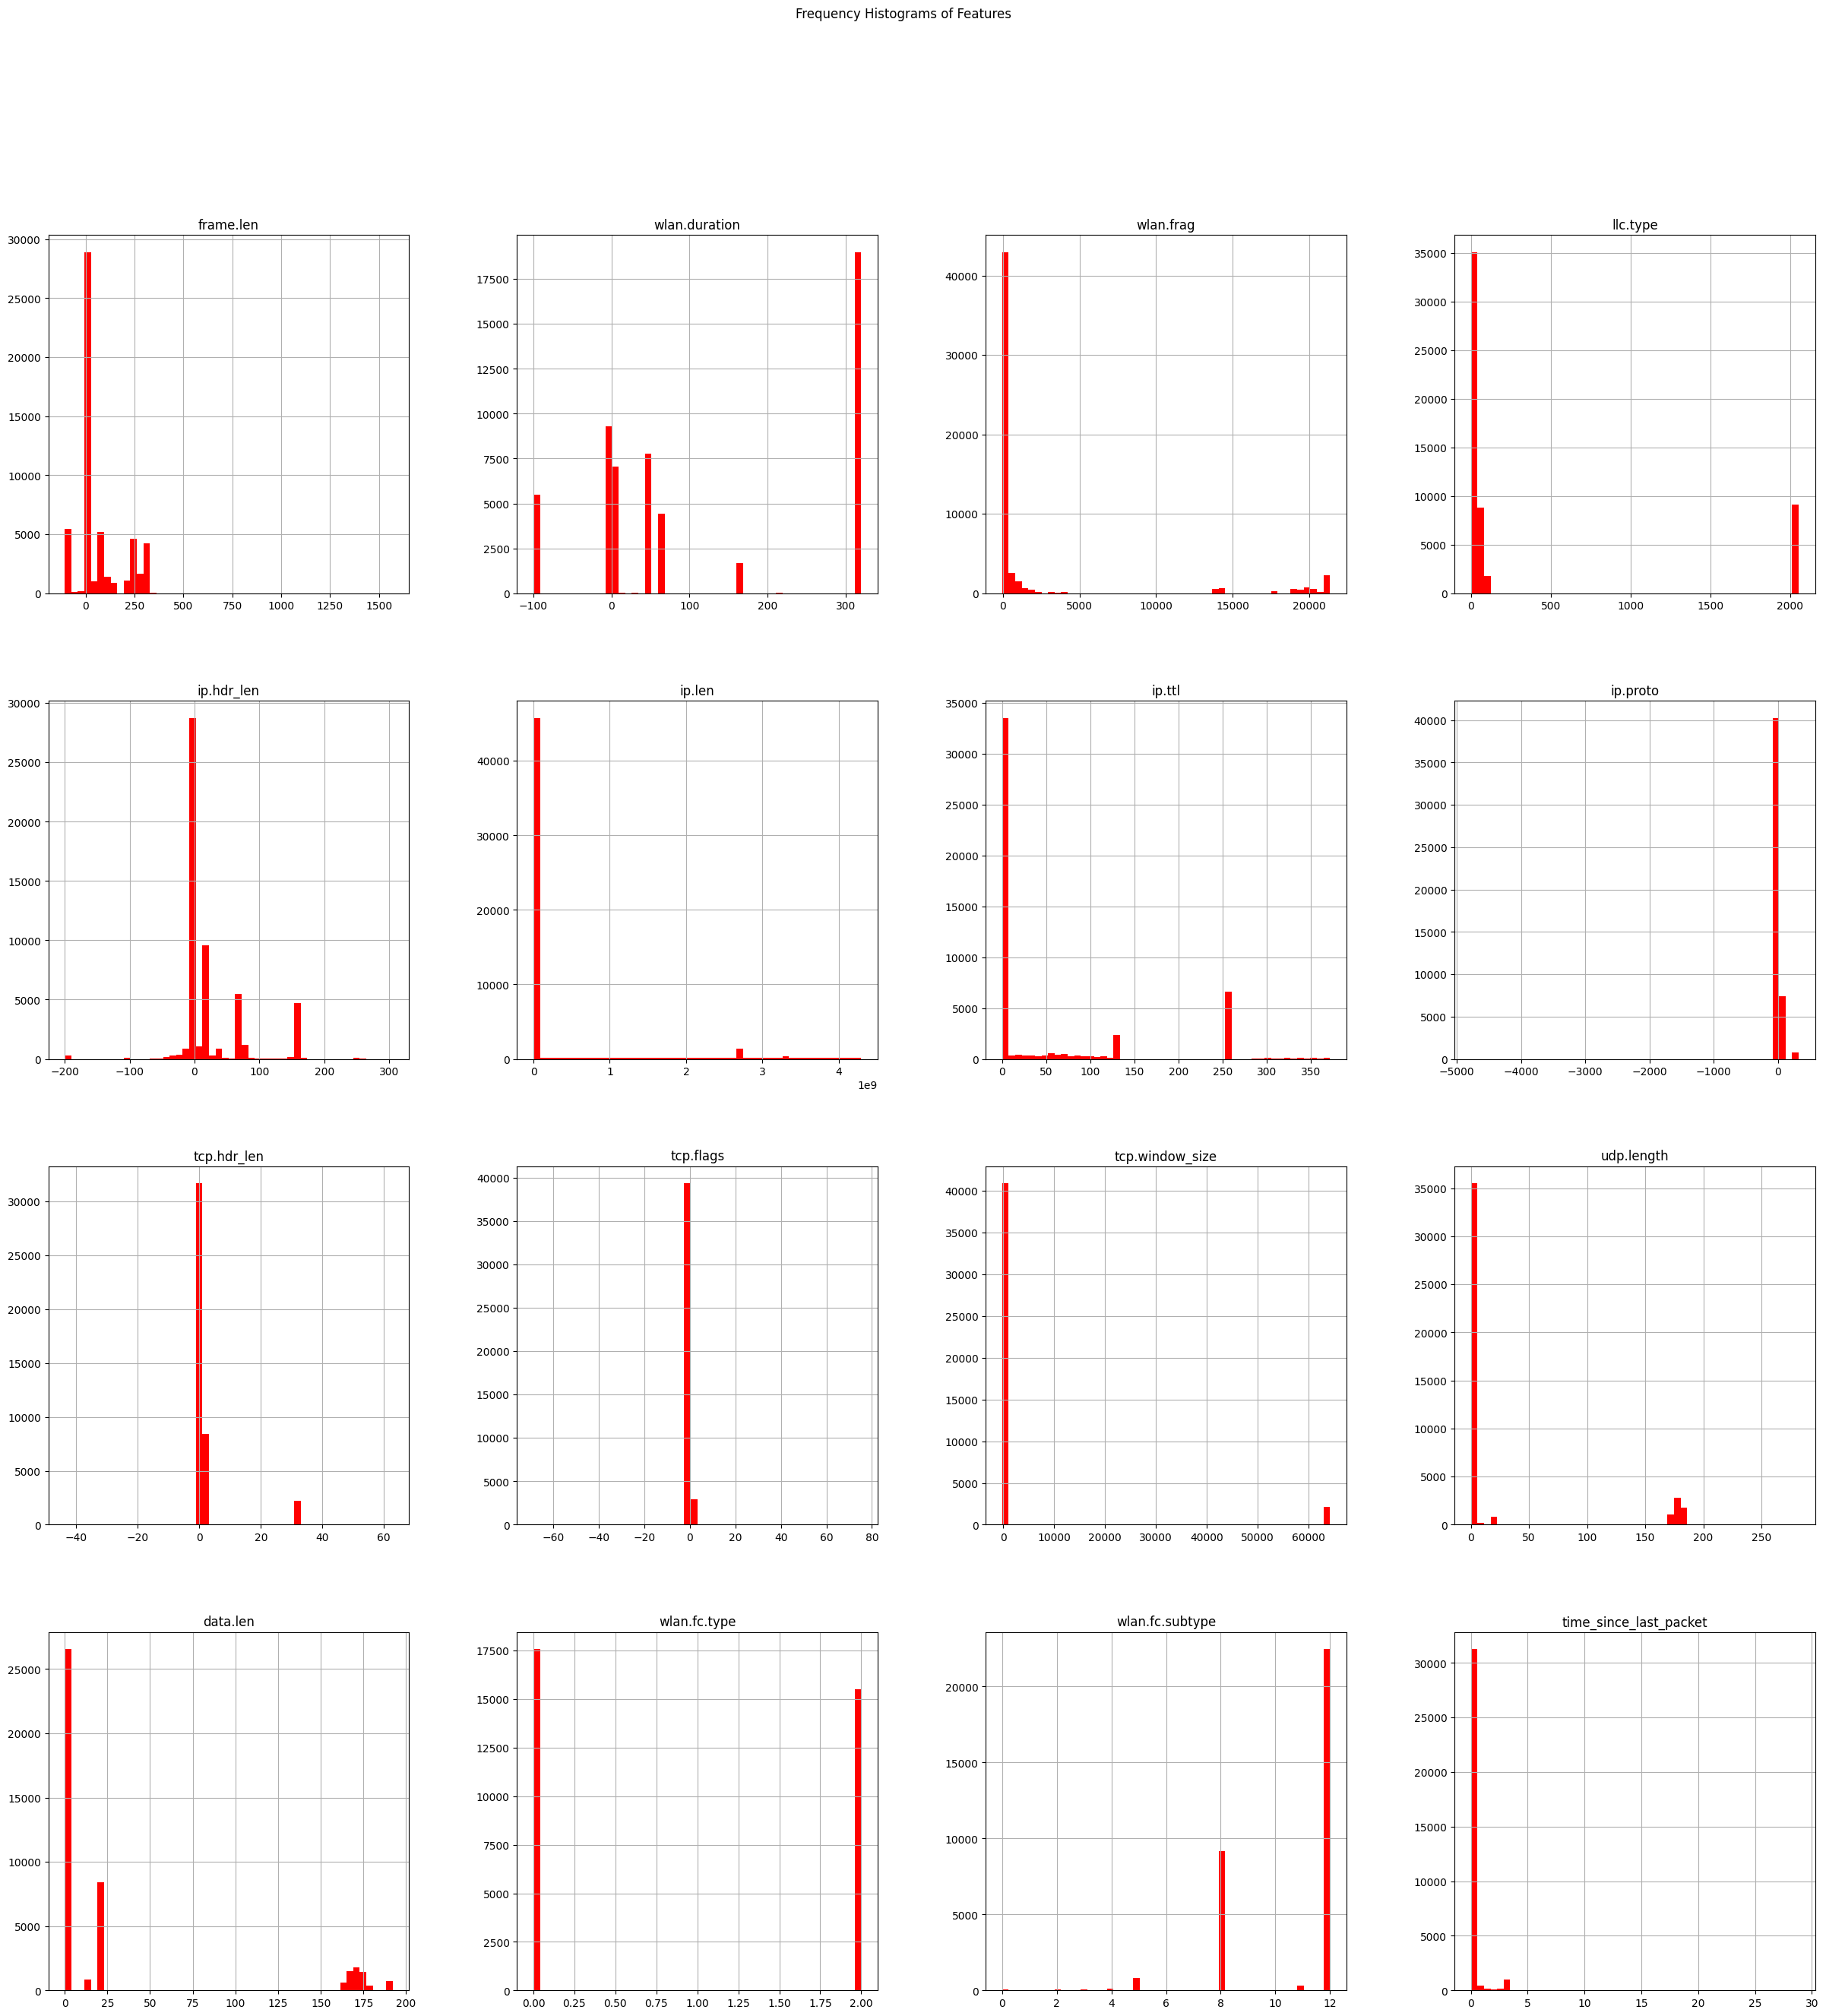

In [15]:
# Checking the data distribution of each feature
# All of these data distributions are skewed, so we'll impute using the median
features.hist(bins = 50, figsize = (30, 30), color = "r")
plt.suptitle("Frequency Histograms of Features")
plt.show()

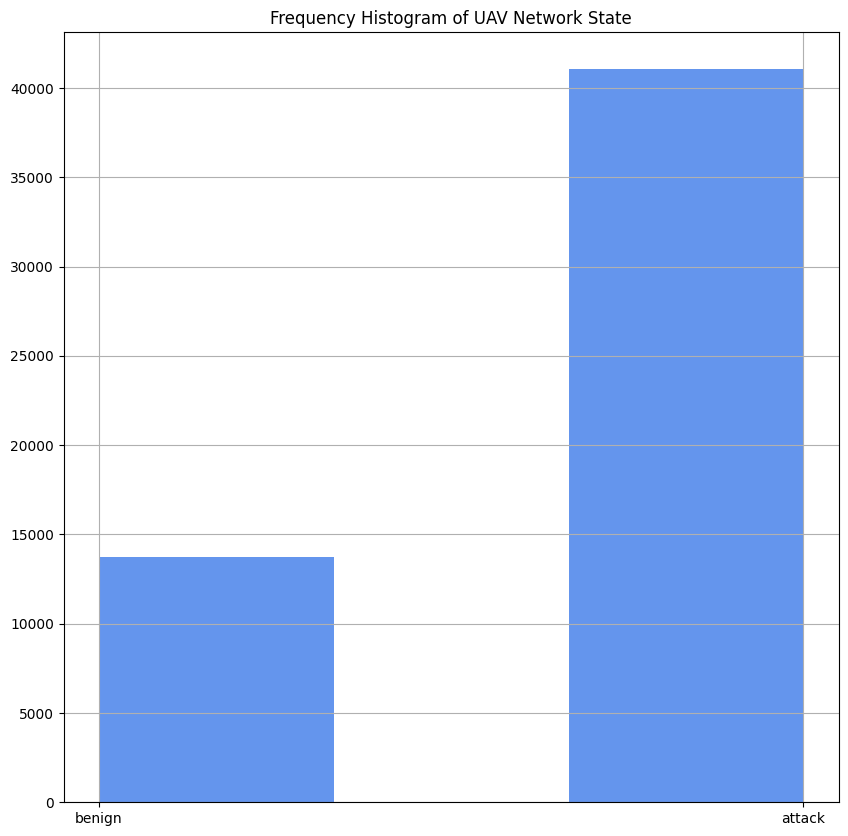

In [16]:
# Comparing the number of benign observations to the number of attack observations
# Using three bins instead of two to easily visually separate the two classes
cleaned_uav_network_df["class"].hist(bins = 3, figsize = (10, 10), color = "cornflowerblue")
plt.title("Frequency Histogram of UAV Network State")
plt.show()

In [17]:
# Dropping wlan.fc.type and wlan.fc.subtype as their importance does not justify their large percentage of missing values
cleaned_uav_network_df = cleaned_uav_network_df.drop(columns = ["wlan.fc.type", "wlan.fc.subtype"])

# Dropping nine observations that lack values for features with an incredibly small percentage of missing values
cleaned_uav_network_df = cleaned_uav_network_df.dropna(subset = ["frame.len", "wlan.duration", "wlan.frag", 
                                                                 "llc.type", "ip.hdr_len", "ip.len"])

# Imputing missing values using the median
# Using the median because it's more robust to outliers compared to the mean
features_to_impute = ["ip.ttl", "ip.proto", "tcp.hdr_len", "tcp.flags", "tcp.window_size", "udp.length", "data.len", 
                      "time_since_last_packet"]

for feature in features_to_impute:
    median_value = cleaned_uav_network_df[feature].median()
    cleaned_uav_network_df[feature] = cleaned_uav_network_df[feature].fillna(median_value)

# Verify that there are no more missing values
print(cleaned_uav_network_df[features_to_impute].isnull().sum())

print("\nInformation about columns...\n")
print(cleaned_uav_network_df.info())

ip.ttl                    0
ip.proto                  0
tcp.hdr_len               0
tcp.flags                 0
tcp.window_size           0
udp.length                0
data.len                  0
time_since_last_packet    0
dtype: int64

Information about columns...

<class 'pandas.core.frame.DataFrame'>
Index: 54774 entries, 0 to 54782
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   frame.len               54774 non-null  float64
 1   wlan.duration           54774 non-null  float64
 2   wlan.frag               54774 non-null  float64
 3   llc.type                54774 non-null  float64
 4   ip.hdr_len              54774 non-null  float64
 5   ip.len                  54774 non-null  float64
 6   ip.ttl                  54774 non-null  float64
 7   ip.proto                54774 non-null  float64
 8   tcp.hdr_len             54774 non-null  float64
 9   tcp.flags               54774 non-null  

In [18]:
# Statistical summary of the cleaned dataset
print(cleaned_uav_network_df.describe())

          frame.len  wlan.duration     wlan.frag      llc.type    ip.hdr_len  \
count  54774.000000    54774.00000  54774.000000  54774.000000  54774.000000   
mean      69.233487      115.52346   2300.825319    357.358802     25.864388   
std      112.519518      152.94823   6117.247607    757.783524     51.818721   
min     -107.000000     -100.00000    -50.000000     -1.000000   -200.000000   
25%       26.000000        0.00000      0.000000      0.000000      0.000000   
50%       26.000000       44.00000      0.000000      8.000000      0.000000   
75%       98.000000      314.00000     41.750000     66.000000     20.000000   
max     1569.000000      320.00000  21356.000000   2054.000000    305.000000   

             ip.len        ip.ttl      ip.proto   tcp.hdr_len     tcp.flags  \
count  5.477400e+04  54774.000000  54774.000000  54774.000000  54774.000000   
mean   3.766453e+08     47.773414      6.149734      1.659648      0.276785   
std    9.660565e+08     92.894270     39.7

In [19]:
# Save the cleaned dataset to a new CSV file
cleaned_uav_network_df.to_csv("Cleaned_UAV_Network_Dataset.csv", index = False)